# EDA for new datasets

## Datasets Used: vehicle_sales, used_cars, ratings
WARNING: VEHICLE_SALES != VEHICLES PLEASE MAKE SURE YOU'RE USING CORRECT SET

Attribute Notes:
- used_cars and reviews datasets don't have a VIN col
- vehicle_sales has a lot of interesting cols: please see which ones you might find interesting (maybe we can make them tables later)
- I didn't do the EDA for vehicle_sales yet because of this fact^

Data notes:
- most reviews are positive
- join between reviews and used_cars gives 3M rows :)

TODO:
- look at vehicle_sales and decide what columns are interesting to include
- decompose datasets into 3NF to create tables
-- Tables:

      1.   Cars(Make, Model, Mileage, Price)
      2.   Reviews(Make, Model, Rating, Review) maybe also include author for fun
      3. FuelInformation(Make, Model, FuelType, MPG)




Easy Query Ideas:
- cars that have a mpg above some range (fuel efficiency -- uses used_cars dataset)
- filter by fuel type (e.g. Hybrid)
- For a (make, model) tuple, what are the reviews?
-- Allow user to sort by best/worst

Complex Query Ideas:
- please help please please


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
prefix = '/content/drive'
from google.colab import drive
drive.mount(prefix, force_remount=True)

Mounted at /content/drive


In [ ]:
used_cars_path = '/content/drive/My Drive/CIS550Datasets/used_cars.csv'
reviews_path = '/content/drive/My Drive/CIS550Datasets/reviews.csv'
vehicle_sales_path = '/content/drive/My Drive/CIS550Datasets/vehicle_sales.csv'

In [ ]:
uc_df = pd.read_csv(used_cars_path)
reviews_df = pd.read_csv(reviews_path)
vs_df = pd.read_csv(vehicle_sales_path)

In [ ]:
uc_df.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


In [ ]:
reviews_df.head()

,Company,Model,Year,Reviewer,Date,Title,Rating,Review
0,acura,ilx,2013,mahowald,08/12/2012,Getting 43 Mpg on daily commute,5,"I love this car.\nGas mileage, suspension, and..."
1,acura,ilx,2013,VIP,07/26/2016,New to me ILX,5,I purchased my 2013 ILX from the dealer used w...
2,acura,ilx,2013,bybchucky,09/14/2013,Excellet Commuter Car,4,I recently purchased a 2013 ILX with the Tech ...
3,acura,ilx,2013,bayareamom,01/26/2015,Peppy Hybrid that Turns Heads,4,We bought our ILX used and have been incredibl...
4,acura,ilx,2013,Kerry Olson,03/26/2016,2013 Acura ILX Hybrid w/ Tech Package,5,In April of 2015 we were in need of another ca...


In [ ]:
vs_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Process used cars dataset

In [ ]:
uc_df.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

In [ ]:
uc_cols_map = {
    'manufacturer' : 'Make',
    'model' : 'Model',
    'year' : 'Year',
    'mileage' : 'Mileage',
    'mpg' : 'MPG',
    'price' : 'Price',
    'accidents_or_damage': 'Accident',
    'one_owner': 'One_owner'
}
uc_df = uc_df.rename(columns=uc_cols_map)
uc_df.columns

Index(['Make', 'Model', 'Year', 'Mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'MPG', 'exterior_color', 'interior_color',
       'Accident', 'One_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'Price'],
      dtype='object')

In [ ]:
uc_cols = ['Price', 'Make', 'Model', 'Year', 'Mileage', 'MPG', 'Accident', 'One_owner']
uc_df = uc_df[uc_cols]
uc_df

,Price,Make,Model,Year,Mileage,MPG,Accident,One_owner
0,13988.0,Acura,ILX Hybrid 1.5L,2013,92945.0,39-38,0.0,0.0
1,17995.0,Acura,ILX Hybrid 1.5L,2013,47645.0,39-38,1.0,1.0
2,17000.0,Acura,ILX Hybrid 1.5L,2013,53422.0,39-38,0.0,1.0
3,14958.0,Acura,ILX Hybrid 1.5L,2013,117598.0,39-38,0.0,1.0
4,14498.0,Acura,ILX Hybrid 1.5L,2013,114865.0,39-38,1.0,0.0
...,...,...,...,...,...,...,...,...
762086,34798.0,Volvo,S60 B5 Momentum,2022,22877.0,25-33,0.0,1.0
762087,12500.0,Volvo,S60 T5,2012,72900.0,NaN,NaN,NaN
762088,12299.0,Volvo,S60 T5,2014,92000.0,21-30,0.0,0.0
762089,8995.0,Volvo,S60 T5 Platinum,2013,132000.0,20-29,1.0,0.0


In [ ]:
# number of null values
uc_df.isnull().any(axis=1).sum()

158592

In [ ]:
# Drop nulls
uc_df = uc_df.dropna()
uc_df.shape

(603499, 8)

In [ ]:
uc_df.dtypes

Price        float64
Make          object
Model         object
Year           int64
Mileage      float64
MPG           object
Accident     float64
One_owner    float64
dtype: object

In [ ]:
uc_df['Year'] = uc_df['Year'].astype(int)
uc_df['Mileage'] = uc_df['Mileage'].astype(int)
uc_df['Price'] = uc_df['Price'].astype(int)
uc_df.dtypes

<ipython-input-123-7cfd4fd9367f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_df['Year'] = uc_df['Year'].astype(int)
<ipython-input-123-7cfd4fd9367f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_df['Mileage'] = uc_df['Mileage'].astype(int)
<ipython-input-123-7cfd4fd9367f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

Price          int64
Make          object
Model         object
Year           int64
Mileage        int64
MPG           object
Accident     float64
One_owner    float64
dtype: object

In [ ]:
uc_df = uc_df.drop_duplicates()
uc_df.shape

(596756, 8)

In [ ]:
uc_df = uc_df.sort_values('Price')
uc_df

,Price,Make,Model,Year,Mileage,MPG,Accident,One_owner
735177,1,Volkswagen,Jetta,2007,133964,22-30,1.0,0.0
5658,1,Acura,TLX V6 A-Spec,2018,49603,20-30,1.0,0.0
584638,259,Nissan,Versa SV,2021,45288,32-40,0.0,0.0
195371,289,Ford,EcoSport Titanium,2019,44077,27-29,1.0,0.0
599832,299,Nissan,Murano SV,2018,120524,21-28,0.0,0.0
...,...,...,...,...,...,...,...,...
49078,1750000,BMW,750 iL,1996,121043,15-20,0.0,0.0
613080,1899999,Porsche,Carrera GT,2004,2361,10-16,0.0,0.0
609009,2099995,Porsche,918 Spyder Base (PDK),2015,2622,20-24,0.0,0.0
613085,2250000,Porsche,Carrera GT,2005,780,10-16,0.0,0.0


In [ ]:
uc_makes = uc_df['Make'].unique()
uc_makes

array(['Audi', 'Subaru', 'Acura', 'Volkswagen', 'Nissan', 'Ford', 'Buick',
       'Toyota', 'Dodge', 'Chrysler', 'Mitsubishi', 'Volvo', 'Kia',
       'Chevrolet', 'Lincoln', 'Mazda', 'Jeep', 'Jaguar', 'GMC',
       'Cadillac', 'INFINITI', 'BMW', 'Mercedes-Benz', 'Honda', 'Lexus',
       'Hyundai', 'Land Rover', 'Porsche', 'RAM'], dtype=object)

In [ ]:
uc_df = uc_df[uc_df['Price'] < 1000000000]
uc_df.reset_index(inplace=True, drop=True)
uc_df

,Price,Make,Model,Year,Mileage,MPG,Accident,One_owner
0,1,Volkswagen,Jetta,2007,133964,22-30,1.0,0.0
1,1,Acura,TLX V6 A-Spec,2018,49603,20-30,1.0,0.0
2,259,Nissan,Versa SV,2021,45288,32-40,0.0,0.0
3,289,Ford,EcoSport Titanium,2019,44077,27-29,1.0,0.0
4,299,Nissan,Murano SV,2018,120524,21-28,0.0,0.0
...,...,...,...,...,...,...,...,...
596750,1650000,Porsche,Carrera GT,2005,9610,10-16,0.0,0.0
596751,1750000,BMW,750 iL,1996,121043,15-20,0.0,0.0
596752,1899999,Porsche,Carrera GT,2004,2361,10-16,0.0,0.0
596753,2099995,Porsche,918 Spyder Base (PDK),2015,2622,20-24,0.0,0.0


In [ ]:
uc_df = uc_df[uc_df['Price'] > 1]
uc_df.reset_index(inplace=True, drop=True)
uc_df

,Price,Make,Model,Year,Mileage,MPG,Accident,One_owner
0,259,Nissan,Versa SV,2021,45288,32-40,0.0,0.0
1,289,Ford,EcoSport Titanium,2019,44077,27-29,1.0,0.0
2,299,Nissan,Murano SV,2018,120524,21-28,0.0,0.0
3,299,Buick,Enclave Premium,2017,115869,15-22,1.0,0.0
4,299,Buick,Encore Essence,2019,115608,0-0,0.0,1.0
...,...,...,...,...,...,...,...,...
596748,1650000,Porsche,Carrera GT,2005,9610,10-16,0.0,0.0
596749,1750000,BMW,750 iL,1996,121043,15-20,0.0,0.0
596750,1899999,Porsche,Carrera GT,2004,2361,10-16,0.0,0.0
596751,2099995,Porsche,918 Spyder Base (PDK),2015,2622,20-24,0.0,0.0


<Axes: >

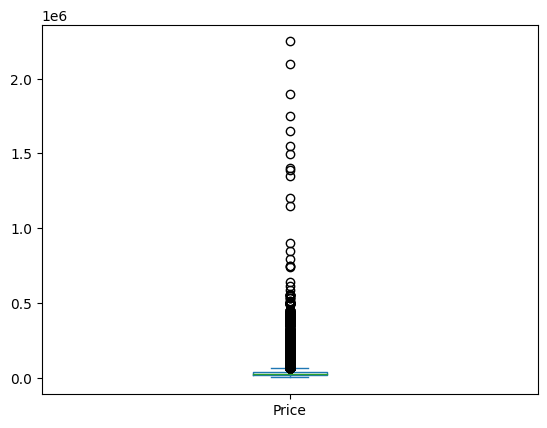

In [ ]:
uc_df['Price'].plot(kind='box')

In [ ]:
uc_df[uc_df['Mileage'] == uc_df['Mileage'].max()]

,Price,Make,Model,Year,Mileage,MPG,Accident,One_owner
118931,16997,Volvo,XC70 3.2L,2010,1119067,16-22,0.0,0.0


<Axes: >

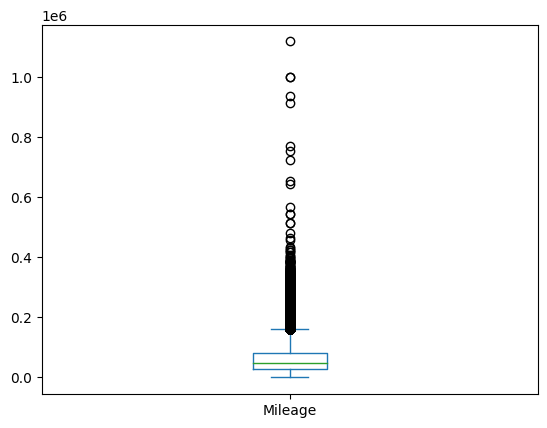

In [ ]:
uc_df['Mileage'].plot(kind='box')

<Axes: ylabel='Frequency'>

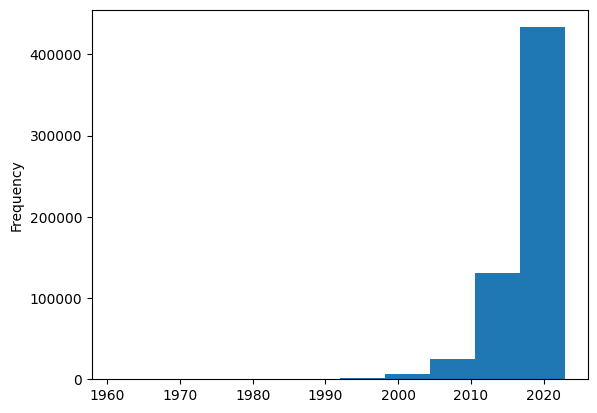

In [ ]:
uc_df['Year'].plot(kind='hist')

In [ ]:
uc_df['Make'] = uc_df['Make'].str.lower()
uc_df['Model'] = uc_df['Model'].str.lower()
uc_df

<ipython-input-132-ec757c168fe9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_df['Make'] = uc_df['Make'].str.lower()
<ipython-input-132-ec757c168fe9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_df['Model'] = uc_df['Model'].str.lower()


,Price,Make,Model,Year,Mileage,MPG,Accident,One_owner
0,259,nissan,versa sv,2021,45288,32-40,0.0,0.0
1,289,ford,ecosport titanium,2019,44077,27-29,1.0,0.0
2,299,nissan,murano sv,2018,120524,21-28,0.0,0.0
3,299,buick,enclave premium,2017,115869,15-22,1.0,0.0
4,299,buick,encore essence,2019,115608,0-0,0.0,1.0
...,...,...,...,...,...,...,...,...
596748,1650000,porsche,carrera gt,2005,9610,10-16,0.0,0.0
596749,1750000,bmw,750 il,1996,121043,15-20,0.0,0.0
596750,1899999,porsche,carrera gt,2004,2361,10-16,0.0,0.0
596751,2099995,porsche,918 spyder base (pdk),2015,2622,20-24,0.0,0.0


In [ ]:
uc_df['Make'].nunique()

29

## Reviews dataset

In [ ]:
reviews_df.columns

Index(['Company', 'Model', 'Year', 'Reviewer', 'Date', 'Title', 'Rating',
       'Review'],
      dtype='object')

In [ ]:
reviews_df

,Company,Model,Year,Reviewer,Date,Title,Rating,Review
0,acura,ilx,2013,mahowald,08/12/2012,Getting 43 Mpg on daily commute,5,"I love this car.\nGas mileage, suspension, and..."
1,acura,ilx,2013,VIP,07/26/2016,New to me ILX,5,I purchased my 2013 ILX from the dealer used w...
2,acura,ilx,2013,bybchucky,09/14/2013,Excellet Commuter Car,4,I recently purchased a 2013 ILX with the Tech ...
3,acura,ilx,2013,bayareamom,01/26/2015,Peppy Hybrid that Turns Heads,4,We bought our ILX used and have been incredibl...
4,acura,ilx,2013,Kerry Olson,03/26/2016,2013 Acura ILX Hybrid w/ Tech Package,5,In April of 2015 we were in need of another ca...
...,...,...,...,...,...,...,...,...
299040,volvo,xc70,2016,FirstVolvo,03/18/2017,Safety First,5,Except for the fact that this unit must have s...
299041,volvo,xc70,2016,Dhp,01/26/2016,Best Volvo Yet,5,Professional review was correct - crossover su...
299042,volvo,xc70,2016,Lisa B,05/03/2016,I love this car!! I own a 2006 and 16!,5,"This car is comfy, rides like a dream, has gre..."
299043,volvo,xc70,2016,Milan,05/04/2019,Couldn't resist,5,When I drove my sister's 2002 XC70 last year I...


In [ ]:
reviews_cols_map = {
    'Company' : 'Make'
}
reviews_df = reviews_df.rename(columns=reviews_cols_map)
reviews_df.columns

Index(['Make', 'Model', 'Year', 'Reviewer', 'Date', 'Title', 'Rating',
       'Review'],
      dtype='object')

In [ ]:
reviews_df['Make'] = reviews_df['Make'].str.lower()
reviews_df['Model'] = reviews_df['Model'].str.lower()

In [ ]:
reviews_df.dtypes

Make        object
Model       object
Year         int64
Reviewer    object
Date        object
Title       object
Rating       int64
Review      object
dtype: object

In [ ]:
reviews_df = reviews_df.sort_values('Rating')
reviews_df.reset_index(inplace=True, drop=True)

In [ ]:
reviews_df

,Make,Model,Year,Reviewer,Date,Title,Rating,Review
0,pontiac,grand-prix,2004,t deering,08/04/2004,good job pontiac,0,First I liked the look then the drive \nthen t...
1,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...
2,buick,enclave,2013,Landon Cox,01/12/2020,2013 Enclave V-6 Engine Failure,1,"At 84,445 miles, the engine quit with absolute..."
3,cadillac,srx,2005,Ranchpilot1,10/05/2019,"Oh No, not an SRX",1,"If you plan to purchase a cadillac SRX, Please..."
4,jeep,patriot,2008,Andrew Roberts,06/18/2017,Heep patriot,1,I'm disappointed that jeep would put their nam...
...,...,...,...,...,...,...,...,...
299040,jeep,gladiator,2020,Jkw,05/19/2020,ARW flash,5,"Visibility is amazing, as is the handling and ..."
299041,jeep,gladiator,2020,Nikolai,11/06/2019,Everything you could want,5,It's a Jeep. It's a truck. It's got legendary ...
299042,jeep,gladiator,2020,Joseph Garcia,03/29/2020,Smooth Ride,5,You'll be amazed once you ride in the truck. T...
299043,jeep,gladiator,2020,JaxSportS,02/21/2020,I really like this truck!,5,Update:August 2020: I've now had my Gladiator ...


<Axes: >

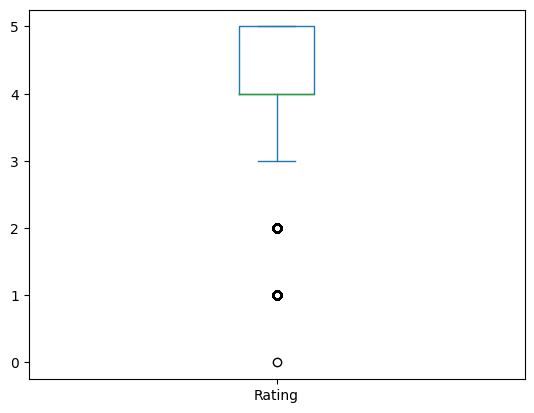

In [ ]:
reviews_df['Rating'].plot(kind='box')

In [ ]:
# number of ratings below 3: around 28,000
reviews_df[reviews_df['Rating'] < 3]

,Make,Model,Year,Reviewer,Date,Title,Rating,Review
0,pontiac,grand-prix,2004,t deering,08/04/2004,good job pontiac,0,First I liked the look then the drive \nthen t...
1,ford,taurus,2003,dtskiles,05/15/2003,"Too much money, too little car",1,1. A car should have pickup or gas \nmileage. ...
2,ford,escape,2013,Asha,01/20/2017,Piece of crap car,1,Bought my car new and have owned it 3 years. ...
3,infiniti,qx,2013,Sabrina,02/01/2017,Could be a lean mean driving machine,1,"Be carful of what gas An gas stations you use,..."
4,ford,escape,2015,Wadsfamily@gmail.com,03/06/2016,Ford Manufacturing has gone down!,1,Ford Manyfacturing has gone down and it shows ...
...,...,...,...,...,...,...,...,...
28524,honda,civic,2010,Dan Sylvia,07/14/2015,[non-permissible content removed],2,This car I got a good deal on getting for abou...
28525,bmw,x6,2008,MrObjective,09/24/2008,Flashy headache,2,"Sure, it gets attention, but I wish more atten..."
28526,honda,civic,2010,dabatangelo,07/14/2014,Don't Buy,2,I've had my hybrid for 4 years.\nIt gets about...
28527,jeep,grand-cherokee,2005,Cristi,01/16/2007,2005 Jeep Cherokee,2,We have had nothing but continuing problems wi...


In [ ]:
reviews_df[reviews_df['Rating'] == 3]

,Make,Model,Year,Reviewer,Date,Title,Rating,Review
46644,chevrolet,silverado-1500,2006,jwarren,03/31/2008,Major Dissapointment,3,Bought the Silverado new in June of 06. Since ...
149596,jaguar,xf,2009,UW HUSKY FAN,02/17/2010,BEWARE!!! The car gets stuck in gear!!!,3,OK...I have been very impressed with my Jaguar...
146729,infiniti,jx,2013,2002blksle,11/28/2012,Living with the JX,3,Traded an 08 CX-9 for the JX.\nThe Mazda handl...
186716,mazda,6,2005,Stuart Summers,07/06/2006,Zoom Zoom Ping Knock Clunk,3,Poor performance and reliability. New 6 speed...
103420,ford,focus,2010,mdmiddleton,08/12/2014,Love my '10 SE,3,I know car magazines love to hate this car but...
...,...,...,...,...,...,...,...,...
34376,cadillac,srx,2005,dave,06/06/2009,oil and water,3,"i really like the car, but like someone else c..."
41657,chevrolet,equinox,2020,Harold,08/22/2020,Terrible front seat comfort,3,Sorry to say this is the most uncomfortable ve...
199312,mercedes-benz,e-class,2019,Driving it because I have to,09/08/2019,Underwhelmed,3,My E450 wagon looks nice. It is so overly com...
5737,acura,tl,2003,cwms97,04/24/2010,Big disappointment,3,I bought my 2003 Acura TL-S in 2006 with about...


<Axes: ylabel='Frequency'>

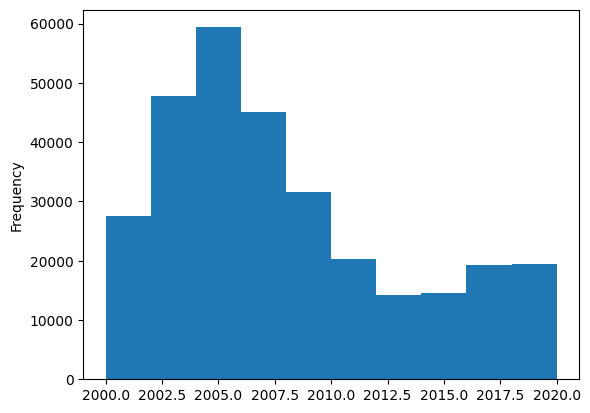

In [ ]:
reviews_df['Year'].plot(kind='hist')

In [ ]:
reviews_df.duplicated().sum()

310

In [ ]:
reviews_df = reviews_df.drop_duplicates()

In [ ]:
reviews_df.reset_index(inplace=True, drop=True)
reviews_df

,Make,Model,Year,Reviewer,Date,Title,Rating,Review
0,pontiac,grand-prix,2004,t deering,08/04/2004,good job pontiac,0,First I liked the look then the drive \nthen t...
1,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...
2,buick,enclave,2013,Landon Cox,01/12/2020,2013 Enclave V-6 Engine Failure,1,"At 84,445 miles, the engine quit with absolute..."
3,cadillac,srx,2005,Ranchpilot1,10/05/2019,"Oh No, not an SRX",1,"If you plan to purchase a cadillac SRX, Please..."
4,jeep,patriot,2008,Andrew Roberts,06/18/2017,Heep patriot,1,I'm disappointed that jeep would put their nam...
...,...,...,...,...,...,...,...,...
298730,jeep,gladiator,2020,Jkw,05/19/2020,ARW flash,5,"Visibility is amazing, as is the handling and ..."
298731,jeep,gladiator,2020,Nikolai,11/06/2019,Everything you could want,5,It's a Jeep. It's a truck. It's got legendary ...
298732,jeep,gladiator,2020,Joseph Garcia,03/29/2020,Smooth Ride,5,You'll be amazed once you ride in the truck. T...
298733,jeep,gladiator,2020,JaxSportS,02/21/2020,I really like this truck!,5,Update:August 2020: I've now had my Gladiator ...


In [ ]:
reviews_df.isnull().any(axis=1).sum()

164

In [ ]:
reviews_df = reviews_df.dropna()

## Vehicle Sales Dataset

In [ ]:
vs_df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [ ]:
vs_cols_map = {
    'year' : 'Year',
    'make' : 'Make',
    'model' : 'Model',
    'vin' : 'Vin',
    'odometer' : 'Mileage',
    'sellingprice' : 'Price',
    'state' : 'State',
    'condition' : 'Condition',
    'color' : 'Color',
    'state' : 'State'
}
vs_df = vs_df.rename(columns=vs_cols_map)

In [ ]:
vs_df.columns

Index(['Year', 'Make', 'Model', 'trim', 'body', 'transmission', 'Vin', 'State',
       'Condition', 'Mileage', 'Color', 'interior', 'seller', 'mmr', 'Price',
       'saledate'],
      dtype='object')

## Joins between datasets
### Reviews and Used Cars

In [ ]:
reviews_df.columns

Index(['Make', 'Model', 'Year', 'Reviewer', 'Date', 'Title', 'Rating',
       'Review'],
      dtype='object')

In [ ]:
uc_df.columns

Index(['Price', 'Make', 'Model', 'Year', 'Mileage', 'MPG', 'Accident',
       'One_owner'],
      dtype='object')

In [ ]:
reviews_of_uc = reviews_df.merge(uc_df, how='inner', on=['Make', 'Model'])

In [ ]:
reviews_of_uc

,Make,Model,Year_x,Reviewer,Date,Title,Rating,Review,Price,Year_y,Mileage,MPG,Accident,One_owner
0,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...,3595,2002,130129,19-25,0.0,0.0
1,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...,7981,2010,118231,18-25,0.0,0.0
2,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...,9998,2005,80729,26,0.0,1.0
3,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...,12495,2015,104827,24-31,0.0,0.0
4,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...,12875,2011,182040,18-25,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264198,bmw,m2,2017,jc,03/07/2018,BMW M2 review,5,The DCT allows a good mpg. Still we can enjoy ...,51495,2018,20477,18-26,0.0,1.0
3264199,bmw,m2,2017,Rich,10/09/2020,Fabulous M2,5,I've had to modify previous sports cars to get...,51495,2018,20477,18-26,0.0,1.0
3264200,bmw,m2,2018,Anthony,07/23/2019,I just love ❤️ my M2,5,"This is a very special car, it’s more old scho...",51495,2018,20477,18-26,0.0,1.0
3264201,bmw,m2,2020,Chuck,09/27/2020,Spicy Enchilada of a Car,5,I've owned all sorts of sports cars. Literally...,51495,2018,20477,18-26,0.0,1.0


In [ ]:
reviews_of_uc = reviews_of_uc.drop(['Year_x', 'Year_y'], axis=1)
reviews_of_uc

,Make,Model,Reviewer,Date,Title,Rating,Review,Price,Mileage,Engine,MPG
0,ford,escape,Asha,01/20/2017,Piece of crap car,1,Bought my car new and have owned it 3 years. ...,30490,8718,2.5L I4 16V MPFI DOHC Hybrid,44-37
1,ford,escape,Wadsfamily@gmail.com,03/06/2016,Ford Manufacturing has gone down!,1,Ford Manyfacturing has gone down and it shows ...,30490,8718,2.5L I4 16V MPFI DOHC Hybrid,44-37
2,ford,escape,Najim Amini,10/05/2019,Piece of Junk,1,"Don't make a mistake to buy this car, When I b...",30490,8718,2.5L I4 16V MPFI DOHC Hybrid,44-37
3,ford,escape,Lisa,10/10/2019,Worst vehicle I’ve ever owned!,1,This was my first new car. Drove it right off ...,30490,8718,2.5L I4 16V MPFI DOHC Hybrid,44-37
4,ford,escape,DB,03/23/2017,Not happy with my 2013 Escape,1,What can I say but I'm very disappointed with ...,30490,8718,2.5L I4 16V MPFI DOHC Hybrid,44-37
...,...,...,...,...,...,...,...,...,...,...,...
3386693,lincoln,blackwood,TC,07/06/2009,All I need,5,"Big, roomy, dependable, attention grabber, etc...",27995,85584,5.4L V8 32V MPFI DOHC,12-17
3386694,lincoln,blackwood,Truck Man,04/30/2002,Sport Utility With The Ultimate Luxurys,5,"First off, the Lincoln Blackwood is NOT \na tr...",24995,42535,5.4L V8 32V MPFI DOHC,12-17
3386695,lincoln,blackwood,Truck Man,04/30/2002,Sport Utility With The Ultimate Luxurys,5,"First off, the Lincoln Blackwood is NOT \na tr...",27995,85584,5.4L V8 32V MPFI DOHC,12-17
3386696,lincoln,blackwood,Donnie Tate,04/19/2006,Very pleased owner,5,I bought my Blackwod in June 0f 2002 and it wa...,24995,42535,5.4L V8 32V MPFI DOHC,12-17


In [ ]:
# Count of duplicates, really shouldn't be any
reviews_of_uc.duplicated().sum()

189

In [ ]:
reviews_of_uc.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
3389338    False
3389339    False
3389340    False
3389341    False
3389342    False
Length: 3389343, dtype: bool

In [ ]:
make_set = set(list(uc_df['Make']))
make_set

{'acura',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'dodge',
 'ford',
 'gmc',
 'honda',
 'hyundai',
 'infiniti',
 'jaguar',
 'jeep',
 'kia',
 'land rover',
 'lexus',
 'lincoln',
 'mazda',
 'mercedes-benz',
 'mitsubishi',
 'nissan',
 'porsche',
 'ram',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo'}

In [ ]:
make_set = set(list(reviews_df['Make']))
make_set

{'acura',
 'alfa-romeo',
 'aston-martin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'dodge',
 'ferrari',
 'fiat',
 'ford',
 'gmc',
 'honda',
 'hyundai',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'land-rover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo'}

In [ ]:
acura_set = set(list(uc_df[uc_df['Make'] == 'acura']['Model']))
acura_set

{'cl 2.3',
 'cl 3.0',
 'cl 3.2',
 'cl 3.2 type s',
 'ilx',
 'ilx 2.0l',
 'ilx 2.0l technology',
 'ilx 2.0l w/premium package',
 'ilx 2.4l',
 'ilx 2.4l (a8)',
 'ilx 2.4l premium',
 'ilx 2.4l w/acurawatch plus pkg',
 'ilx 2.4l w/premium package',
 'ilx 4dr sdn',
 'ilx 8-spd',
 'ilx a-spec',
 'ilx a-spec/premium pkg/power&heated seats/sunroof/adap',
 'ilx acurawatch plus package',
 'ilx base',
 'ilx base (a8)',
 'ilx base (dct)',
 'ilx hybrid 1.5l',
 'ilx one owner w/ power moonroof&more!!!',
 'ilx premium & a-spec packages',
 'ilx premium and a-spec packages',
 'ilx premium package',
 'ilx prm spec',
 'ilx special edition',
 'ilx technology & a-spec',
 'ilx technology & a-spec packages',
 'ilx technology & a-spec pkgs',
 'ilx technology package',
 'ilx technology plus & a-spec packages',
 'ilx technology plus package',
 'ilx technology&a-spec packages',
 'ilx technology&a-spec pkgs',
 'ilx w/acurawatch plus',
 'ilx w/premium package',
 'ilx w/premium pkg',
 'ilx w/premium/a-spec package'

In [ ]:
acura_set_2 = set(list(reviews_df[reviews_df['Make'] == 'acura']['Model']))
acura_set_2

{'cl',
 'ilx',
 'integra',
 'mdx',
 'nsx',
 'rdx',
 'rl',
 'rlx',
 'rsx',
 'tl',
 'tlx',
 'tsx',
 'tsx-sport-wagon',
 'zdx'}

In [ ]:
reviews_of_uc['Make'].unique()

array(['ford', 'mercedes-benz', 'toyota', 'chevrolet', 'chrysler',
       'acura', 'cadillac', 'honda', 'nissan', 'volkswagen', 'kia', 'gmc',
       'mazda', 'mitsubishi', 'buick', 'porsche', 'jaguar', 'jeep',
       'volvo', 'infiniti', 'hyundai', 'ram', 'dodge', 'bmw', 'audi',
       'lincoln', 'subaru'], dtype=object)

<Axes: xlabel='Make'>

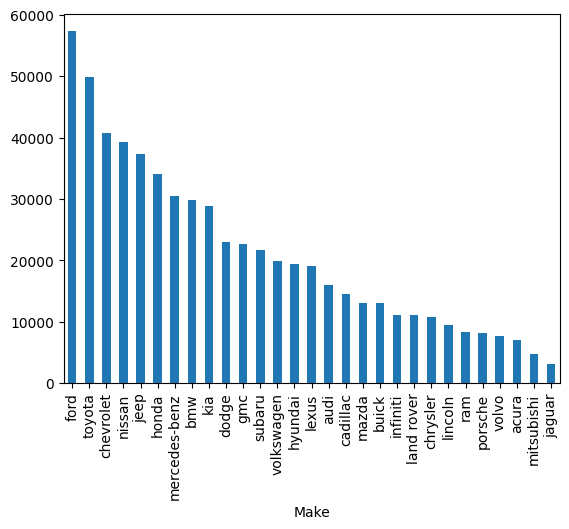

In [ ]:
uc_df['Make'].value_counts().plot(kind='bar')

In [ ]:
reviews_of_uc['Make'].value_counts()

Make
toyota           1529573
ford              596848
acura             232079
honda             181284
chevrolet         115098
volkswagen         98609
porsche            96667
kia                82158
bmw                70937
infiniti           58667
cadillac           53988
hyundai            46474
mercedes-benz      45317
nissan             39783
mitsubishi         36771
lincoln            32065
chrysler           23523
audi               19481
volvo               8092
dodge               7266
buick               3421
jaguar              2344
gmc                 1806
jeep                1746
subaru              1532
ram                  727
mazda                442
Name: count, dtype: int64

In [ ]:
reviews_of_uc[reviews_of_uc['Make'] == 'acura']['Model'].unique()

array(['mdx', 'tlx', 'rdx', 'rl', 'tl', 'ilx', 'rsx', 'tsx', 'zdx', 'nsx'],
      dtype=object)

In [ ]:
uc_models = set(uc_df['Model'])

In [ ]:
reviews_models = set(reviews_df['Model'])

In [ ]:
common_keys = reviews_of_uc[['Make', 'Model']].drop_duplicates()

In [ ]:
common_keys

,Make,Model
0,ford,escape
2571,mercedes-benz,m-class
3692,toyota,corolla
89687,chevrolet,impala
91623,chrysler,sebring
...,...,...
3385828,audi,r8
3386150,bmw,m2
3386160,chrysler,prowler
3386484,jaguar,xkr


In [ ]:
common_in_uc_df = uc_df[uc_df.set_index(['Make', 'Model']).index.isin(common_keys.set_index(['Make', 'Model']).index)].reset_index(drop=True)

# Filter reviews_df for rows where 'Make' and 'Model' are in common_keys
common_in_reviews_df = reviews_df[reviews_df.set_index(['Make', 'Model']).index.isin(common_keys.set_index(['Make', 'Model']).index)].reset_index(drop=True)

In [ ]:
common_in_uc_df

,Price,Make,Model,Year,Mileage,Engine,MPG
0,994,mitsubishi,lancer,2006,255000,2.0L I4 16V MPFI SOHC,28-35
1,1492,kia,amanti,2006,124229,3.5L V6 24V MPFI DOHC,17-25
2,1500,lincoln,continental,1999,140329,4.6L V8 32V MPFI DOHC,17-25
3,1950,chevrolet,astro,2004,0,"Engine, Vortec 4300 V6 MFI (190 HP [141.7 kW] ...",16-21
4,1990,cadillac,deville,1996,115411,4.6L V8 32V MPFI DOHC,17-26
...,...,...,...,...,...,...,...
3225,299990,bmw,m5,2003,746,5.0L V8 32V MPFI DOHC,13-21
3226,344274,ford,ranger,2020,61454,2.3L I4 16V GDI DOHC Turbo,20-24
3227,426900,ford,gt,2006,4481,5.4L V8 32V MPFI DOHC Supercharged,13-21
3228,439998,ford,gt,2005,1892,Gas V8 5.4L/330,13-21


In [ ]:
common_in_reviews_df

,Make,Model,Year,Reviewer,Date,Title,Rating,Review
0,ford,escape,2013,Asha,01/20/2017,Piece of crap car,1,Bought my car new and have owned it 3 years. ...
1,ford,escape,2015,Wadsfamily@gmail.com,03/06/2016,Ford Manufacturing has gone down!,1,Ford Manyfacturing has gone down and it shows ...
2,mercedes-benz,m-class,2003,KmW,01/22/2003,TOTAL NIGHTMARE,1,Power windows that wouldn't go back up \n(in a...
3,ford,escape,2013,Najim Amini,10/05/2019,Piece of Junk,1,"Don't make a mistake to buy this car, When I b..."
4,ford,escape,2015,Lisa,10/10/2019,Worst vehicle I’ve ever owned!,1,This was my first new car. Drove it right off ...
...,...,...,...,...,...,...,...,...
165383,chrysler,pacifica,2017,Bob,08/13/2017,Old Timers Cruiser,5,"Chrysler has reinvented the minivan again, buy..."
165384,chrysler,pacifica,2017,Subhash Chawla,12/28/2017,Chrysler Pacifica Touring L Plus,5,We drove Honda Odyssey earlier but were not ve...
165385,chrysler,pacifica,2017,Robert Busse,07/29/2016,Thet Hit It Out Of The Park!,5,
165386,chrysler,pacifica,2017,Eric Jorgensen,10/10/2017,Do Your Homework,5,Read reviews like Edmunds and Consumer Reports...


In [ ]:
uc_df

,Price,Make,Model,Year,Mileage,Engine,MPG
0,259,nissan,versa sv,2021,45288,Engine: 1.6L DOHC 16-Valve 4-Cylinder,32-40
1,289,ford,ecosport titanium,2019,44077,Engine: 1.0L EcoBoost -inc: auto start-stop te...,27-29
2,299,buick,enclave premium,2017,115869,"Engine, 3.6L Variable Valve Timing V6 with SID...",15-22
3,299,nissan,murano sv,2018,120524,Engine: 3.5L DOHC 24-Valve V6,21-28
4,319,volkswagen,jetta s,2019,120092,Engine: 1.4L TSI I-4 Turbocharged -inc: DOHC 1...,30-40
...,...,...,...,...,...,...,...
612087,1650000,porsche,carrera gt,2005,9610,5.7L V10 40V MPFI DOHC,10-16
612088,1750000,bmw,750 il,1996,121043,5.4L V12 24V MPFI SOHC,15-20
612089,1899999,porsche,carrera gt,2004,2361,5.7L V10 40V MPFI DOHC,10-16
612090,2099995,porsche,918 spyder base (pdk),2015,2622,4.6L V8 32V GDI DOHC Hybrid,20-24


In [ ]:
reviews_df

,Make,Model,Year,Reviewer,Date,Title,Rating,Review
0,pontiac,grand-prix,2004,t deering,08/04/2004,good job pontiac,0,First I liked the look then the drive \nthen t...
1,ford,taurus,2003,dtskiles,05/15/2003,"Too much money, too little car",1,1. A car should have pickup or gas \nmileage. ...
2,ford,escape,2013,Asha,01/20/2017,Piece of crap car,1,Bought my car new and have owned it 3 years. ...
3,infiniti,qx,2013,Sabrina,02/01/2017,Could be a lean mean driving machine,1,"Be carful of what gas An gas stations you use,..."
4,ford,escape,2015,Wadsfamily@gmail.com,03/06/2016,Ford Manufacturing has gone down!,1,Ford Manyfacturing has gone down and it shows ...
...,...,...,...,...,...,...,...,...
299040,chrysler,pacifica,2017,Bob,08/13/2017,Old Timers Cruiser,5,"Chrysler has reinvented the minivan again, buy..."
299041,chrysler,pacifica,2017,Subhash Chawla,12/28/2017,Chrysler Pacifica Touring L Plus,5,We drove Honda Odyssey earlier but were not ve...
299042,chrysler,pacifica,2017,Robert Busse,07/29/2016,Thet Hit It Out Of The Park!,5,
299043,chrysler,pacifica,2017,Eric Jorgensen,10/10/2017,Do Your Homework,5,Read reviews like Edmunds and Consumer Reports...


In [ ]:
uc_df

,Price,Make,Model,Year,Mileage,MPG,Accident,One_owner
0,259,nissan,versa sv,2021,45288,32-40,0.0,0.0
1,289,ford,ecosport titanium,2019,44077,27-29,1.0,0.0
2,299,nissan,murano sv,2018,120524,21-28,0.0,0.0
3,299,buick,enclave premium,2017,115869,15-22,1.0,0.0
4,299,buick,encore essence,2019,115608,0-0,0.0,1.0
...,...,...,...,...,...,...,...,...
596748,1650000,porsche,carrera gt,2005,9610,10-16,0.0,0.0
596749,1750000,bmw,750 il,1996,121043,15-20,0.0,0.0
596750,1899999,porsche,carrera gt,2004,2361,10-16,0.0,0.0
596751,2099995,porsche,918 spyder base (pdk),2015,2622,20-24,0.0,0.0


In [ ]:
reviews_df.reset_index(drop=True, inplace=True)
reviews_df

,Make,Model,Year,Reviewer,Date,Title,Rating,Review
0,pontiac,grand-prix,2004,t deering,08/04/2004,good job pontiac,0,First I liked the look then the drive \nthen t...
1,mercedes-benz,c-class,2001,Bad News Mercedes,07/27/2003,Mercedes doesn't Care,1,No quality customer service here and\nMercedes...
2,buick,enclave,2013,Landon Cox,01/12/2020,2013 Enclave V-6 Engine Failure,1,"At 84,445 miles, the engine quit with absolute..."
3,cadillac,srx,2005,Ranchpilot1,10/05/2019,"Oh No, not an SRX",1,"If you plan to purchase a cadillac SRX, Please..."
4,jeep,patriot,2008,Andrew Roberts,06/18/2017,Heep patriot,1,I'm disappointed that jeep would put their nam...
...,...,...,...,...,...,...,...,...
298566,jeep,gladiator,2020,Jkw,05/19/2020,ARW flash,5,"Visibility is amazing, as is the handling and ..."
298567,jeep,gladiator,2020,Nikolai,11/06/2019,Everything you could want,5,It's a Jeep. It's a truck. It's got legendary ...
298568,jeep,gladiator,2020,Joseph Garcia,03/29/2020,Smooth Ride,5,You'll be amazed once you ride in the truck. T...
298569,jeep,gladiator,2020,JaxSportS,02/21/2020,I really like this truck!,5,Update:August 2020: I've now had my Gladiator ...


In [ ]:
uc_df.to_csv('used_cars.csv')

In [ ]:
from google.colab import files
files.download('used_cars.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
reviews_df.to_csv('reviews.csv')
files.download('reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
vs_df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

In [ ]:
uc_df.dtypes

Price          int64
Make          object
Model         object
Year           int64
Mileage        int64
MPG           object
Accident     float64
One_owner    float64
dtype: object

In [ ]:
reviews_df.dtypes

Make        object
Model       object
Year         int64
Reviewer    object
Date        object
Title       object
Rating       int64
Review      object
dtype: object

<Axes: ylabel='Frequency'>

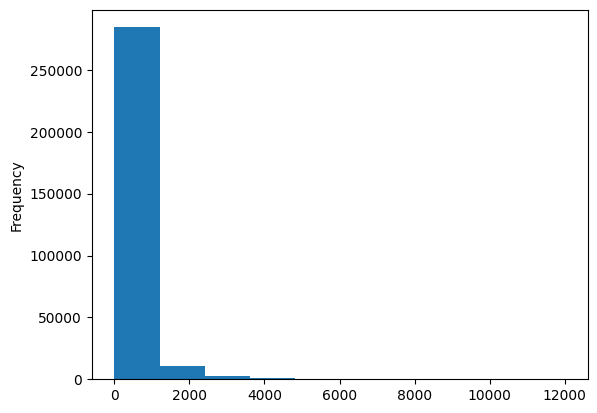

In [ ]:
reviews_df['Review'].str.len().plot(kind='hist')